# Overfitting y underfitting

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (12, 8)}, style='white')
np.random.seed(42)

## Simulación con un modelo lineal

Generamos datos de acuerdo al siguiente modelo:

\begin{align}
y &= \alpha_1 x + \alpha_0 + \epsilon \\
\alpha_1 &= 1.5 \\
\alpha_0 &= 2 \\
\epsilon &\sim \mathcal{N}(0, 1)\\
\end{align}

In [3]:
X = np.linspace(0, 10, 30, endpoint=False)

α_1 = 1.5
α_0 = 2
ϵ = np.random.normal(0, 1, size=len(X))
Y = α_1 * X + α_0 + ϵ

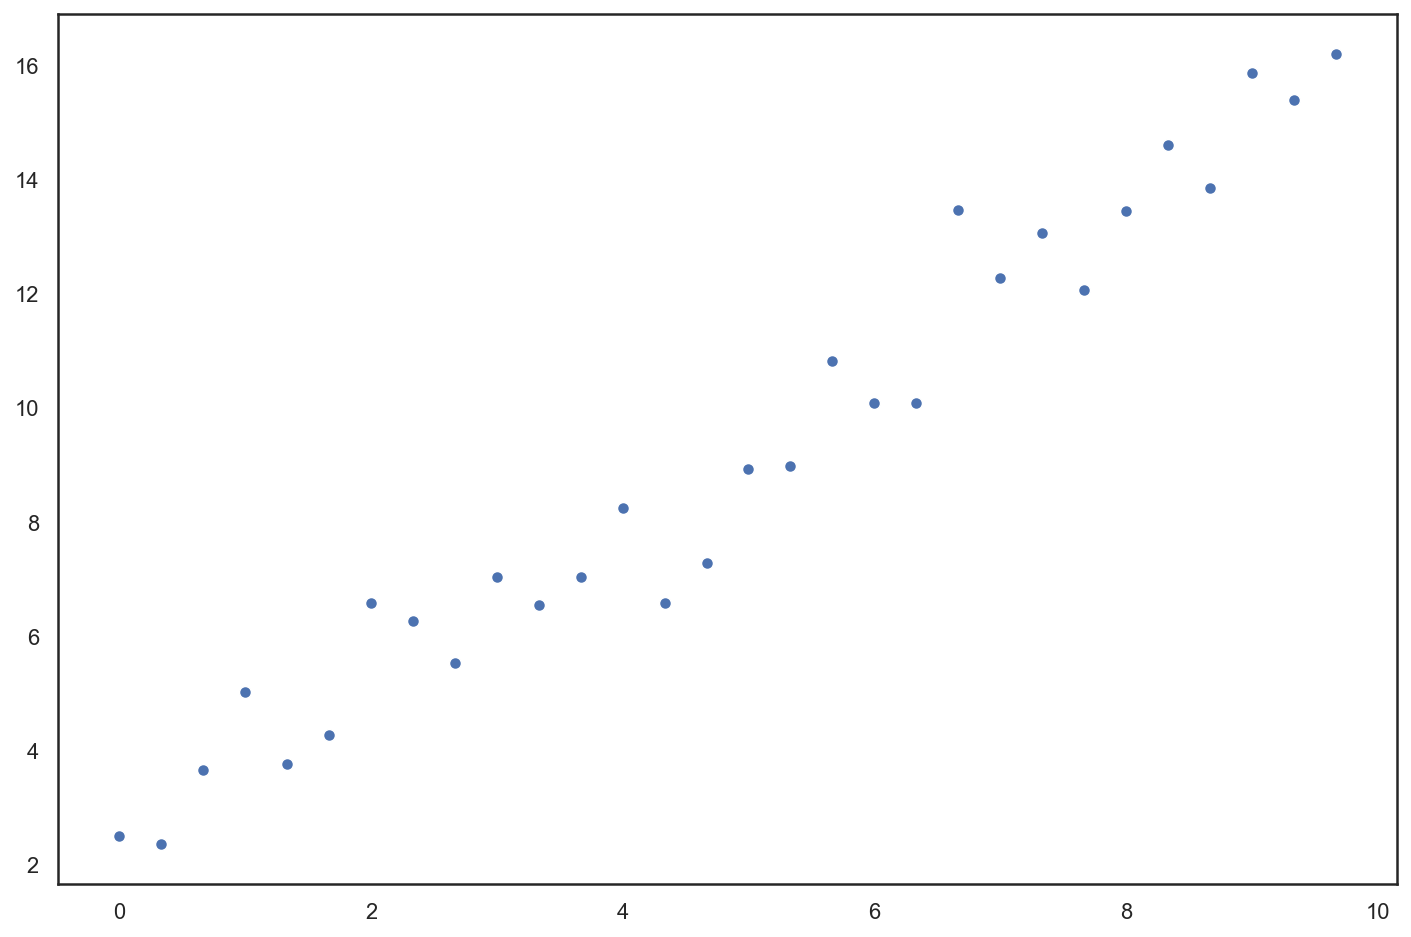

In [4]:
sns.scatterplot(X, Y)

## Regresión lineal

Ahora hacemos un fit con un modelo lineal.

$$ \hat{y} = \alpha_1 x + \alpha_0$$

In [5]:
modelo_lineal = np.polyfit(X, Y, deg=1)

In [6]:
modelo_lineal

array([1.39458098, 2.32137836])

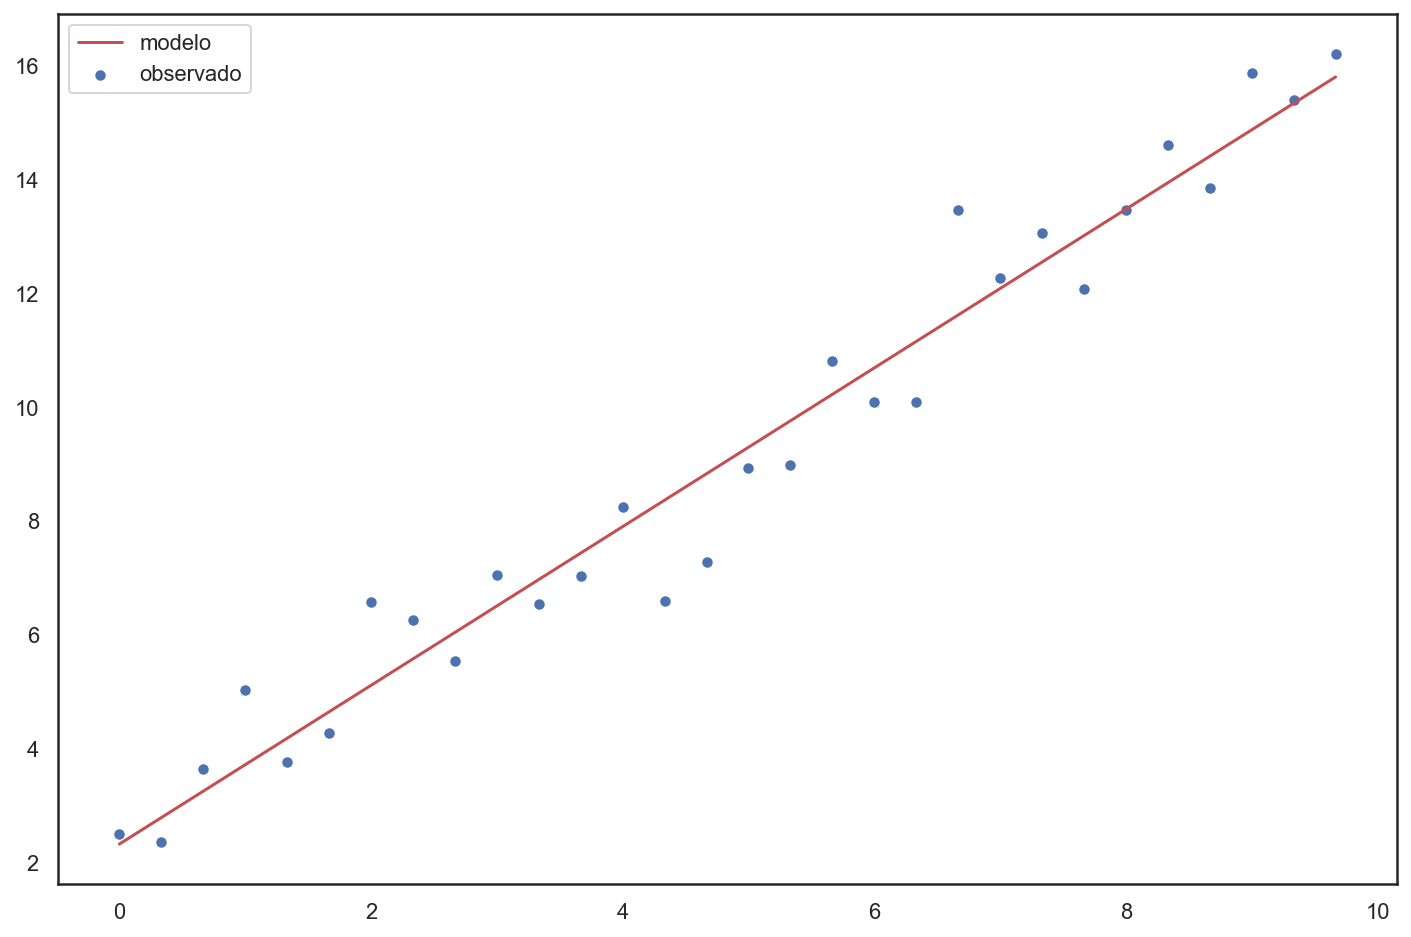

In [7]:
Y_predicted = np.polyval(modelo_lineal, X)

ax = sns.scatterplot(X, Y, label='observado')
sns.lineplot(X, Y_predicted, color='r', label='modelo')

A continuación, simulamos nuevos datos, usando el modelo inicial.

In [8]:
X_nuevos = np.linspace(10, 15, 15)
Y_nuevos = α_1 * X_nuevos + α_0 + np.random.normal(0, 1, size=len(X_nuevos))

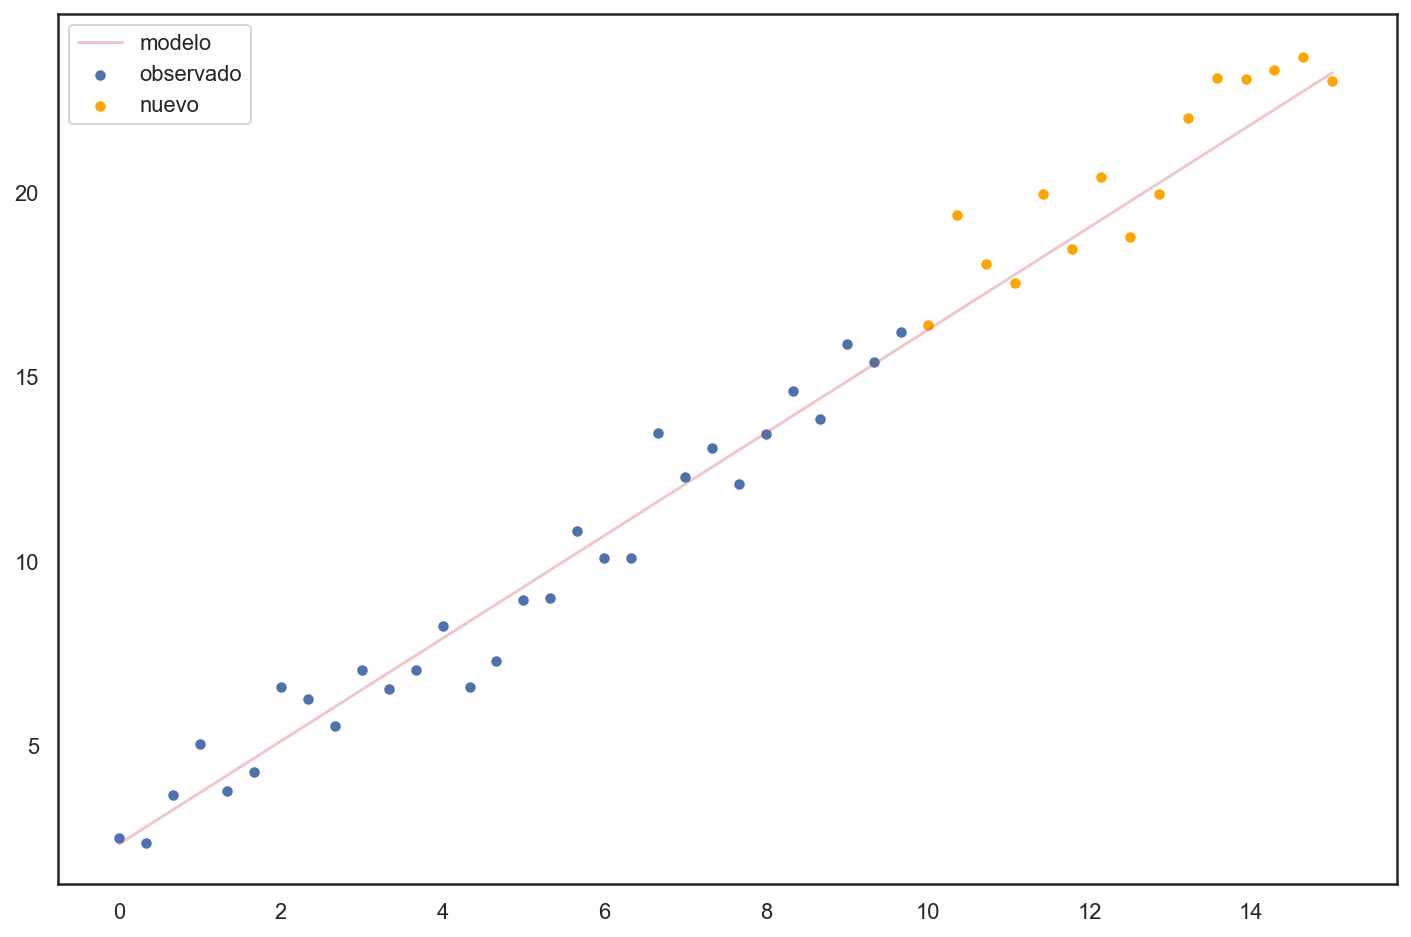

In [9]:
Y_predicted_nuevos = np.polyval(modelo_lineal, X_nuevos)

X_todos = np.append(X, X_nuevos)
Y_todos = np.append(Y, Y_nuevos)
Y_predicted_todos = np.append(Y_predicted, Y_predicted_nuevos)

ax = sns.scatterplot(X, Y, label='observado')
sns.scatterplot(X_nuevos, Y_nuevos, label='nuevo', color='orange', ax=ax)
sns.lineplot(X_todos, Y_predicted_todos, color='r', label='modelo', alpha=0.3, ax=ax)

Para ver cuán bueno fue el fit, ploteamos los residuos.

$$e = y - \hat{y}$$

Dónde $y$ son los valores observados y $\hat{y}$ las predicciones de nuestro modelo.

In [12]:
def plot_residuals(x, y, y_pred):
    residuals = y - y_pred
    _fig, (ax1, ax2) = plt.subplots(1, 2)
    
    sns.scatterplot(x, residuals, ax=ax1)
    ax1.axhline(0, linestyle='--', color='grey', alpha=0.6)
    sns.distplot(residuals, ax=ax2)

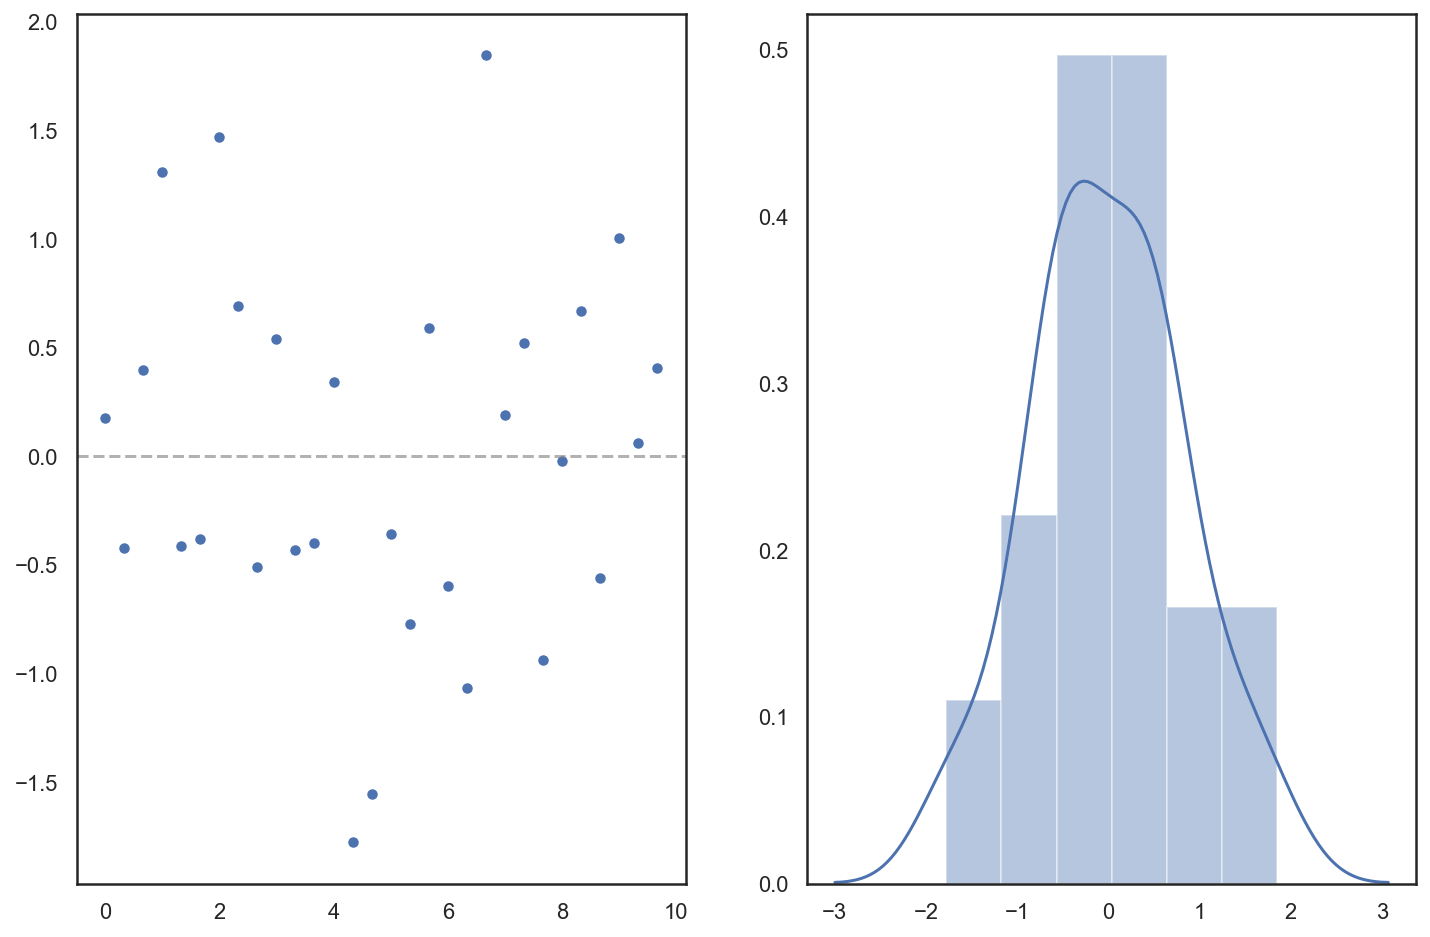

In [13]:
plot_residuals(X, Y, Y_predicted)

También podemos calcular el [coeficiente de determinación](https://es.wikipedia.org/wiki/Coeficiente_de_determinación), conocido como $R^2$, que determina que proporción de la varianza de los datos explica el modelo.

$$R^2 := 1 - \frac{RSS}{TSS} \\
RSS = \sum (y - \hat{y})^2 \\
TSS = \sum (y - \bar{y})^2$$

Donde $RSS$ es la [suma del cuadrado de los residuos](https://en.wikipedia.org/wiki/Residual_sum_of_squares), $TSS$ es la [suma total de los cuadrados](https://en.wikipedia.org/wiki/Total_sum_of_squares) y $\bar{y}$ es la media lo los valores observados de $y$.

In [14]:
def r_squared(y, y_pred):  
    RSS = ((y - y_pred) ** 2).sum()
    TSS = ((y - y.mean()) ** 2).sum()
    
    return 1 - RSS/TSS

In [15]:
r_squared(Y, Y_predicted)

0.9590924499139448

## Regresión polinómica

Probamos ahora fitteando una [regresión polinomial](https://es.wikipedia.org/wiki/Regresión_no_lineal#Regresión_polinomial) de 4to grado.

$$ \hat{y} = \sum_{i=0}^{4} \alpha_i x^i$$

In [16]:
modelo_polinomico = np.polyfit(X, Y, deg=4)
modelo_polinomico

array([-0.0047652 ,  0.09426085, -0.56455497,  2.36610021,  2.24718869])

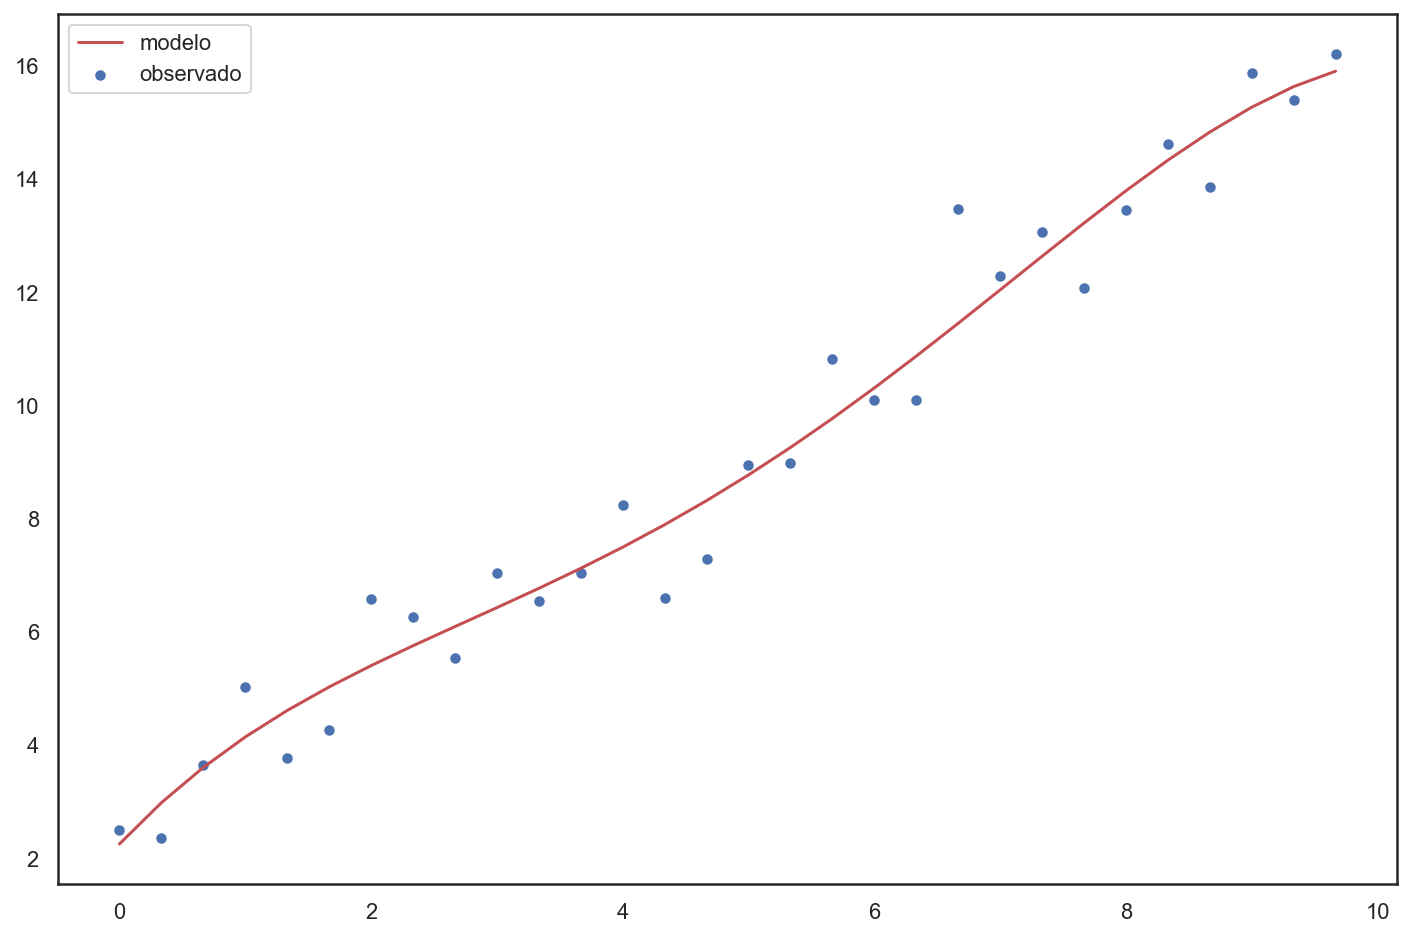

In [17]:
Y_predicted = np.polyval(modelo_polinomico, X)

ax = sns.scatterplot(X, Y, label='observado')
sns.lineplot(X, Y_predicted, color='r', label='modelo')

In [18]:
r_squared(Y, Y_predicted)

0.9656338527552731

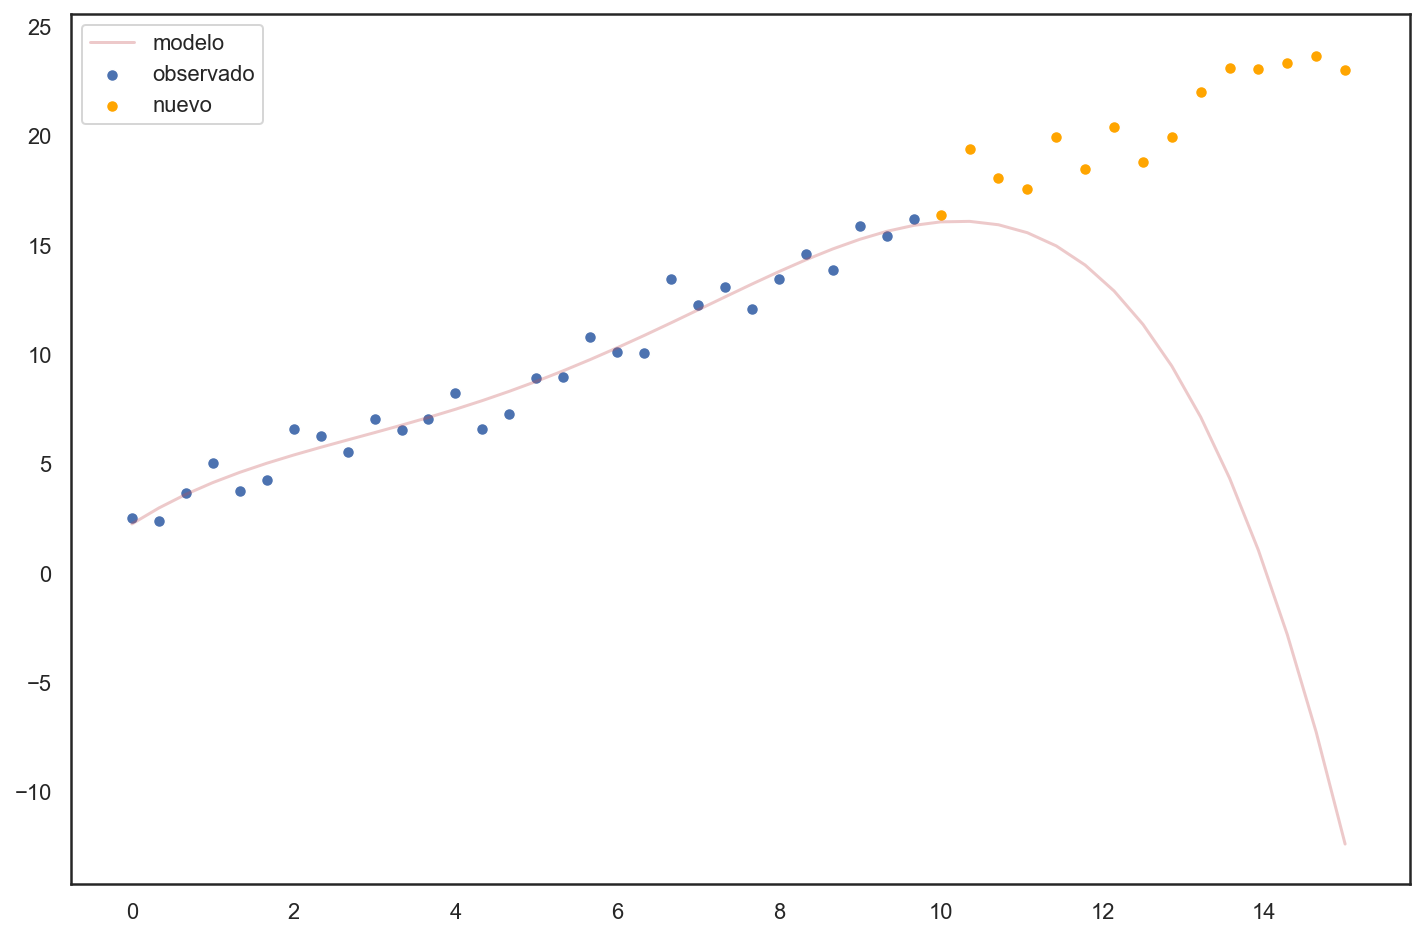

In [19]:
Y_predicted_nuevos = np.polyval(modelo_polinomico, X_nuevos)
Y_predicted_todos = np.append(Y_predicted, Y_predicted_nuevos)

ax = sns.scatterplot(X, Y, label='observado')
sns.scatterplot(X_nuevos, Y_nuevos, label='nuevo', color='orange', ax=ax)
sns.lineplot(X_todos, Y_predicted_todos, color='r', label='modelo', alpha=0.3, ax=ax)

## Simulación con un modelo cuadrático

\begin{align}
y &= \alpha_2 x^2 + \alpha_1 x + \alpha_0 + \epsilon \\
\alpha_2 &= 2 \\
\alpha_1 &= 1.5 \\
\alpha_0 &= 2 \\
\epsilon &\sim \mathcal{N}(0, 1)\\
\end{align}

In [20]:
X = np.linspace(-3, 3, 30, endpoint=False)

α_2 = 2
α_1 = 1.5
α_0 = 2
ϵ = np.random.normal(0, 1, size=len(X))
Y = α_2 * X * X + α_1 * X + α_0 + ϵ

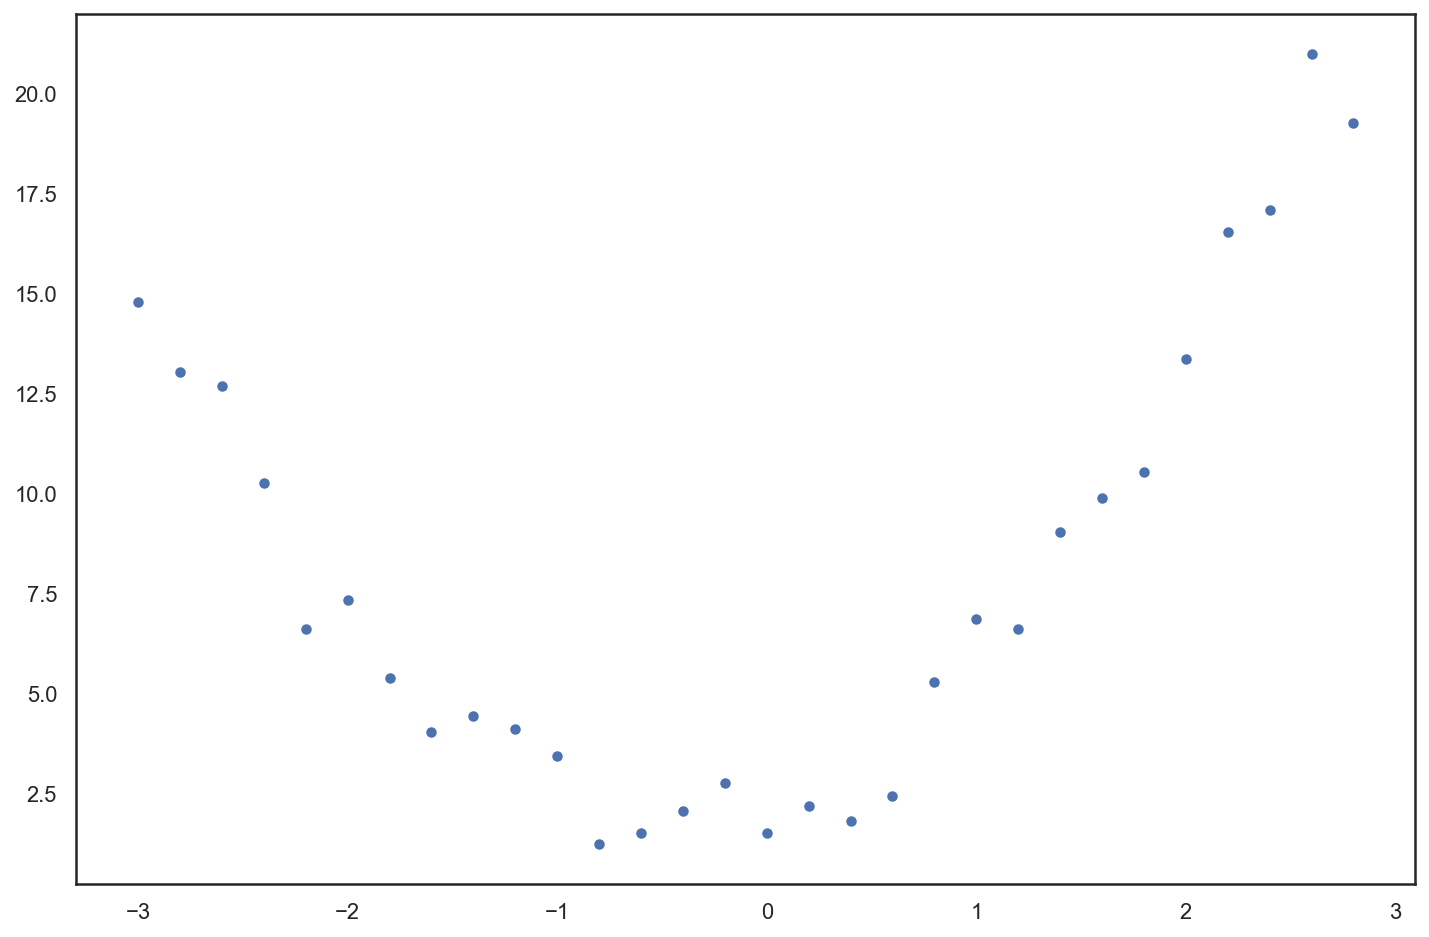

In [21]:
sns.scatterplot(X, Y)

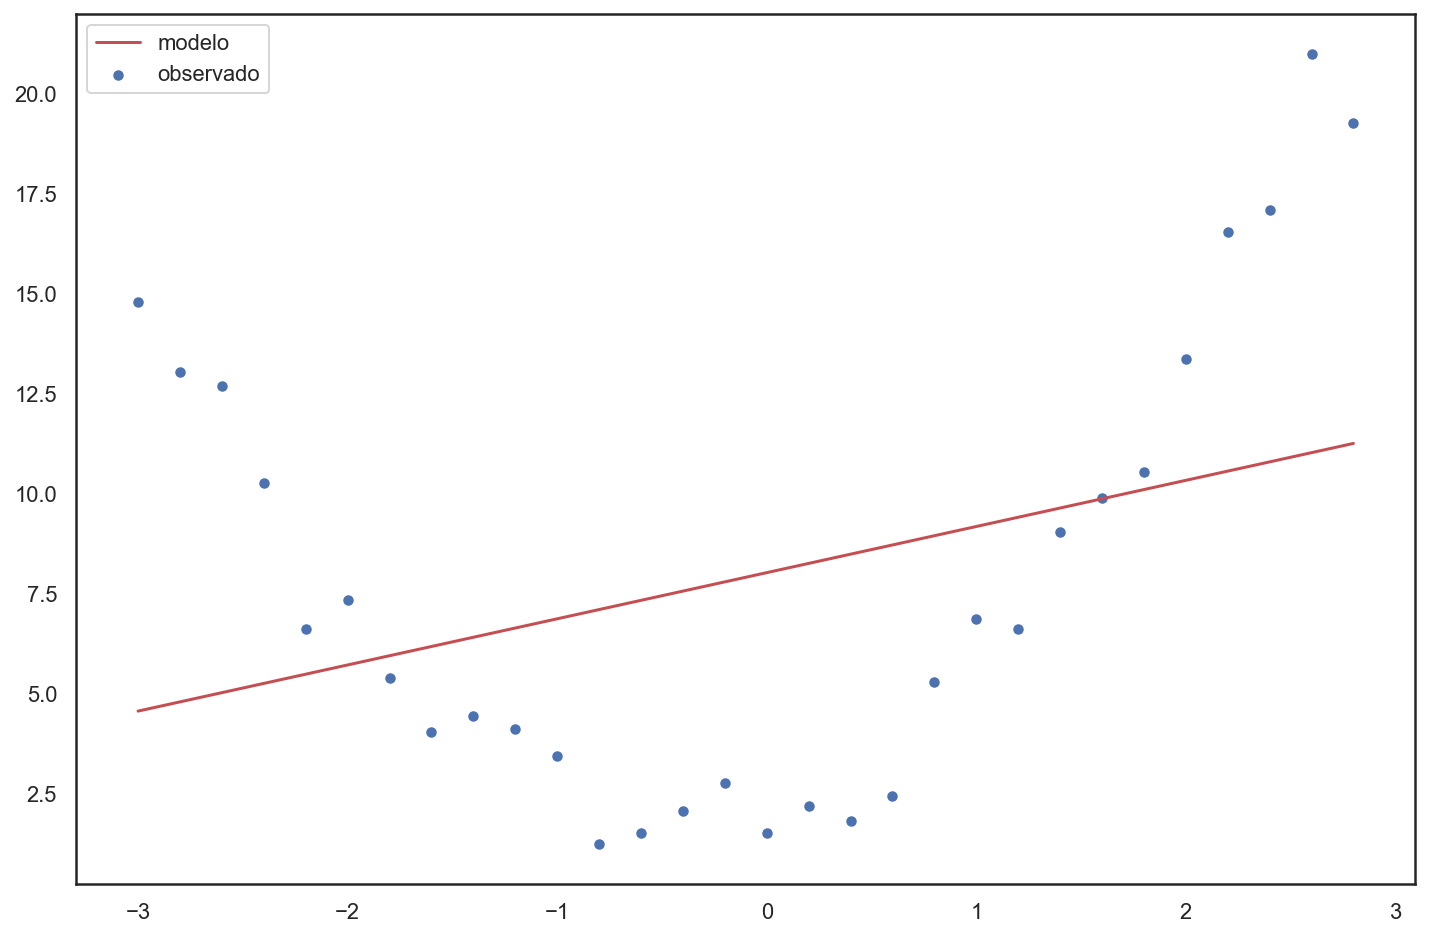

In [22]:
modelo_lineal = np.polyfit(X, Y, deg=1)

Y_predicted = np.polyval(modelo_lineal, X)

ax = sns.scatterplot(X, Y, label='observado')
sns.lineplot(X, Y_predicted, color='r', label='modelo')

In [23]:
r_squared(Y, Y_predicted)

0.12354571557502825

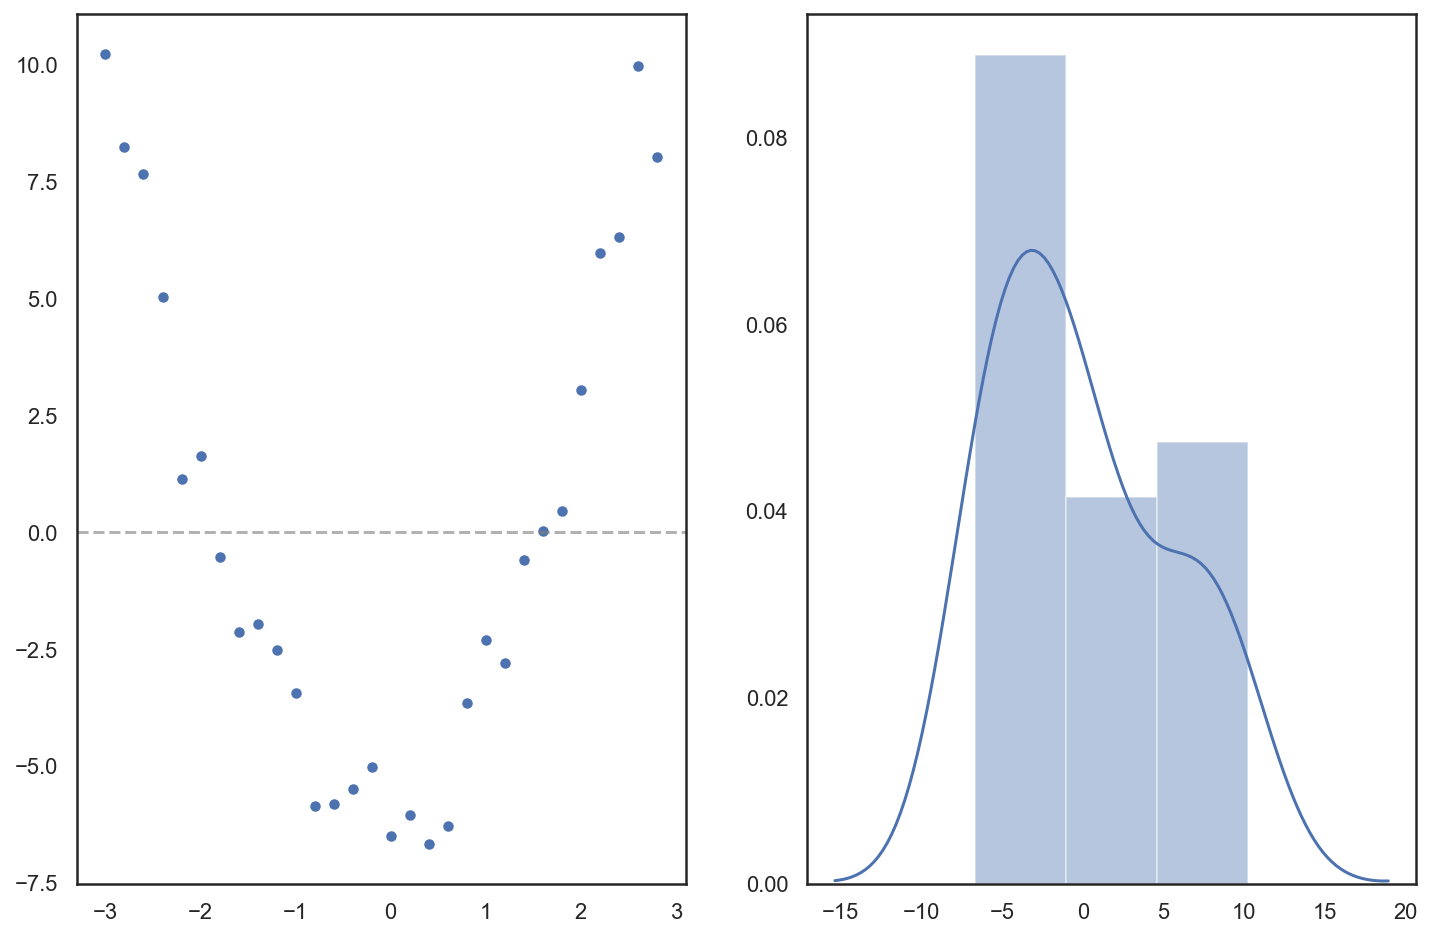

In [24]:
plot_residuals(X, Y, Y_predicted)

En este caso, podemos observar que nuestro modelo no captura correctamente la estructura de los datos.

## Ejercicio

Ajustar un modelo cuadrático y calcular el coeficiente de determinación.